# Read, write and create SU data 

The SU data format is a subset of the industrial standard SEG-Y. It consists in a binary trace header containing useful informations on the data such as: the number of time samples (ns), the time sampling (dt), the source and receiver positions (sx, sy, gx and gy), the position of the trace in the file and other fields to store metadata.

## Read a SU file

In [1]:
# Import the SUdata class from nessi.io module
from nessi.io import SUdata

# Declare
dobs = SUdata()

# Read the SU file
dobs.read('data/musc_F50_01.su')

## Access to metadata

The access to header is very simple since a valid keyword is provided. Some header values, such as `dt`, are not in second and a scaling factor must be applied (please see Seismic Unix keyword documentation for more informations).

In [2]:
# Get number of time samples and the time sampling
ns = dobs.header[0]['ns']
dt = dobs.header[0]['dt']/1000000.
print(ns, dt)

12000 0.0001


Header values can be directly modified, *i.e.* to modify the time sampling for all the traces:

`dobs.header[:]['dt'] = new_value_in_seconds * 1000000.`

## Visualize data

Since many useful informations are stored in the SU header, plotting data is easy and the function's parameters are almost all related to the output image layout.  

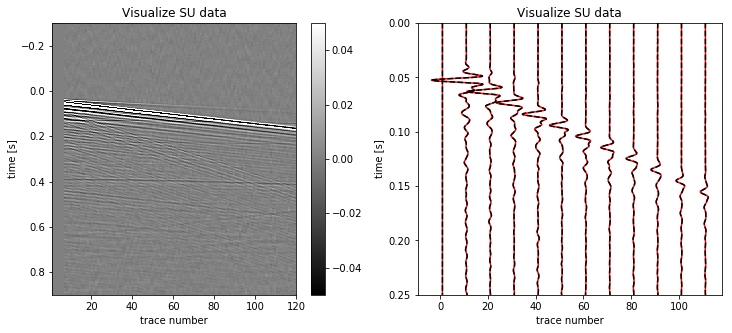

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

# Show data
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
dobs.image(clip=0.05, label2='trace number', label1='time [s]', title='Visualize SU data', legend=1)
plt.subplot(122)
plt.ylim(0.25, 0.)
dobs.wiggle(label2='trace number', label1='time [s]', title='Visualize SU data', skip=10, xcur=2, tracecolor='red')
dobs.wiggle(label2='trace number', label1='time [s]', title='Visualize SU data', skip=10, xcur=2, tracecolor='black', tracestyle='--')
plt.show()

## Write SU file on disk

In [4]:
# Write a SU file
dobs.write('data/output.su')

## Create SU data

In [5]:
# Import numpy module
import numpy as np

# Create fake data using numpy with the time-axis along axis 1
ntrac_fake = 20
ns_fake = 10000
dt_fake = 0.0001
data_fake = np.zeros((ntrac_fake, ns_fake))

# Create a simple SU dataset with minimal informations (tracl, ns, dt) from a numpy array
dobs_fake = SUdata()
dobs_fake.create(data_fake, dt_fake)

# Check header values and the number of traces
print(dobs_fake.header[0]['ns'], dobs_fake.header[0]['dt']/1000000., np.size(dobs_fake.header, axis=0))

[10000] [0.0001] 20
